<a href="https://colab.research.google.com/github/mehakmalik28/GRIP-Sparks-Foundation/blob/master/Task3_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KmeansClustering:**

The objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.

A cluster refers to a collection of data points aggregated together because of certain similarities.

We’ll define a target number k, which refers to the number of centroids we need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.

In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

In [ ]:
## importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

## Loading iris data as dataframe
dataframe = pd.read_csv("/content/Iris.csv")
## taking glance at the dataset
dataframe.head(10)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
##getting information about the dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
##checking if it has nan values
dataframe.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
##checking if it has duplicate rows
dataframe.duplicated().sum()

0

In [ ]:
##Getting description of data
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [ ]:
## Getting label counts
dataframe.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

**DATA** **VISUALIZATION**

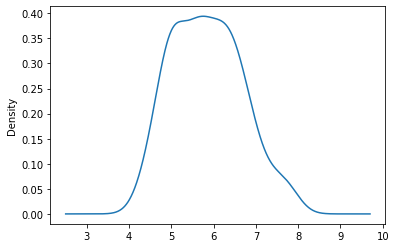

In [ ]:
## Visualing sepal_length's variation
dataframe['SepalLengthCm'].plot(kind = 'kde')

Univariate analysis
Target Class


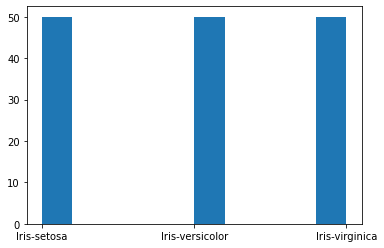

Sepal_length


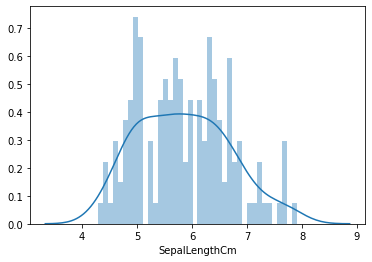

Sepal_width


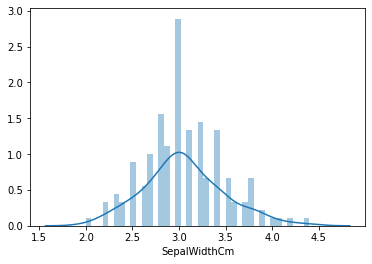

Petal_length


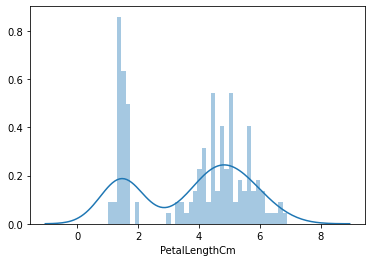

Petal_width


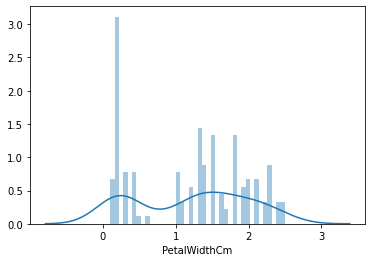

In [ ]:
#Exploratory data analysis
print("Univariate analysis")
print("Target Class")
plt.hist(dataframe['Species'])
plt.show()
print ("Sepal_length")
sns.distplot(dataframe['SepalLengthCm'],kde=True,bins=40)
plt.show()
print ("Sepal_width")
sns.distplot(dataframe['SepalWidthCm'],kde=True,bins=40)
plt.show()
print ("Petal_length")
sns.distplot(dataframe['PetalLengthCm'],kde=True,bins=40)
plt.show()
print ("Petal_width")
sns.distplot(dataframe['PetalWidthCm'],kde=True,bins=40)
plt.show()

Bivariate Analysis


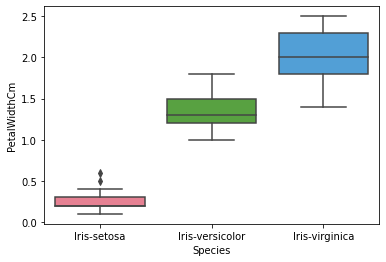

In [ ]:
## boxplot for looking if any outliers are there
print('Bivariate Analysis')
sns.boxplot(x='Species', y='PetalWidthCm', palette = 'husl',data= dataframe)

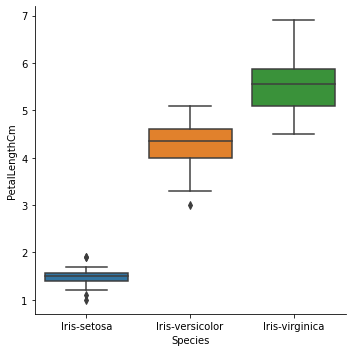

In [ ]:
sns.catplot(x='Species', y='PetalLengthCm', kind = 'box',data= dataframe)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


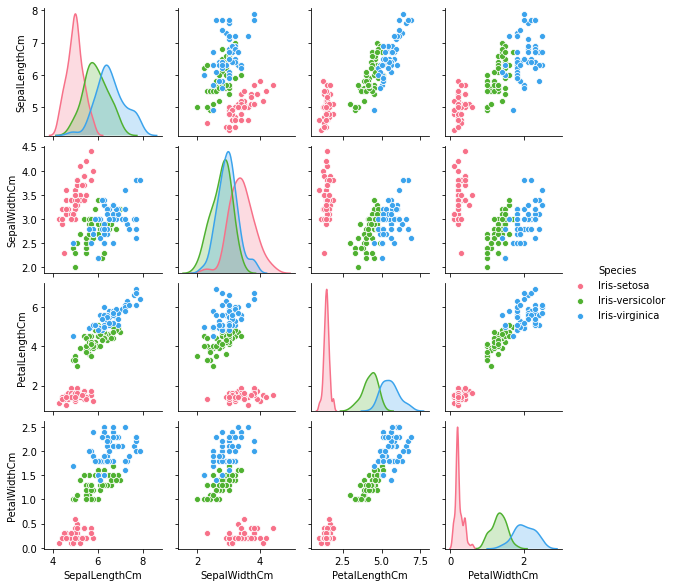

In [ ]:
sns.pairplot(dataframe.drop('Id',axis = 1),hue = 'Species',palette='husl',size=2, diag_kind= 'kde')

In [ ]:
## Checking correlation between features
cor = dataframe.drop('Id',axis = 1).corr()
cor

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


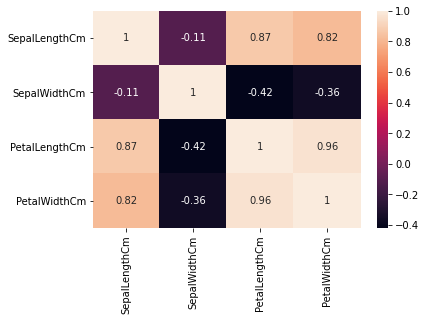

In [ ]:
## plotting heatmap to visualize the correlation
sns.heatmap(cor, annot = True)

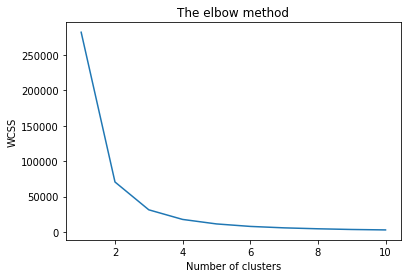

In [ ]:
## Getting features forom data
x = dataframe.iloc[:, [0, 1, 2, 3]].values
##checking clusters with different k values using kmeans clustering
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

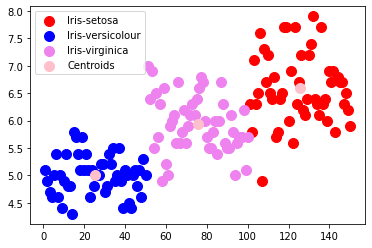

In [31]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'violet', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'pink', label = 'Centroids')

plt.legend()